# 第14章聚类方法

## 习题14.1
&emsp;&emsp;试写出分裂聚类算法，自上而下地对数据进行聚类，并给出其算法复杂度。

**解答：**  

**解答思路：**

输入：n个样本组成的样本集合以及设定的样本类别数k

输出：满足设定的样本类别数的对样本集合的一个层次化聚类

(1)初始化，构建1个类，该类包含全部样本

(2)计算n个样本两两之间的欧氏距离

(3)分裂距离最大的两个样本，将其分到不同的类，并设置为各自的类中心

(4)计算剩余样本与目前各个类中心的距离，分裂类间距离最大的样本作为新的类中心，构建一个新类

(5)如果类的个数满足设定的类别数，则进行步骤(6),否则回到步骤(4)。

(6)根据当前的类中心，按照最近邻的原则对整个数据集进行分类。

**解答步骤：** 
代码如下，时间复杂度为$O(k n^2)$

<IPython.core.display.Javascript object>


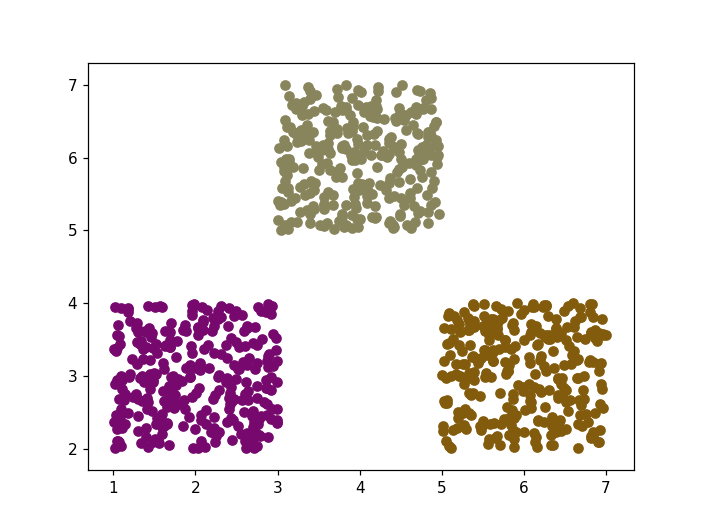

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import matplotlib.colors as mcolors


def getDataset():
    '''
    :return: dataset: 数据集
    '''
#     datamat = loadmat("./cluster_gauss.mat")
#     dataset = datamat["data"].T
    
    data_1 = np.hstack([((np.random.random(300) - 0.5) * 2 + 2).reshape(-1,1),
                       ((np.random.random(300) - 0.5) * 2 + 3).reshape(-1,1)])
    data_2 = np.hstack([((np.random.random(300) - 0.5) * 2 + 4).reshape(-1,1),
                       ((np.random.random(300) - 0.5) * 2 + 6).reshape(-1,1)])
    data_3 = np.hstack([((np.random.random(300) - 0.5) * 2 + 6).reshape(-1,1),
                       ((np.random.random(300) - 0.5) * 2 + 3).reshape(-1,1)])
    
    dataset = np.vstack([data_1,data_2,data_3])
    return dataset

def TopToDownCluster(data, num_sample, num_class):
    '''

    :param data: 数据集
    :param num_sample: 数据集中的样本个数
    :param num_class: 设定的聚类类别个数
    :return: label: 每个样本的标签
             class_center: 类中心
    '''

    if num_class == 1:
        class_center = np.sum(data, axis=0) / num_sample
        label = np.ones((num_sample, 1))
    else:
        # (1) 初始化，构建1个类，该类包含全部样本
        # 每个样本对应的label都为0
        label = np.zeros((num_sample, 1))
        class_center = []

        # (2) 计算n个样本两两之间的欧氏距离
        distance = np.zeros((num_sample, num_sample))
        for i in range(num_sample):
            temp = data[i, :].reshape(1, 2)
            temp_repeated = np.repeat(temp, num_sample, axis=0)
            temp_distance = np.sum(np.power(data - temp_repeated, 2), axis=1)
            distance[i,:] = temp_distance

        # (3) 分裂距离最大的两个样本，并设置为各自的类中心
        index = np.where(np.max(distance)==distance)
        class_1 = index[1][0]
        class_2 = index[1][1]
        label[class_1] = 1
        label[class_2] = 2
        class_center.append(data[class_1, :])
        class_center.append(data[class_2, :])
       
        num_class_temp = 2
        distance_min = np.zeros((num_sample,1))
        # (5)判断类的个数满足设定的类别数
        while(num_class_temp != num_class):
            for i in range(num_sample):
                # (4.1)计算剩余样本与目前各个类中心的距离，
                temp = data[i, :].reshape(1, 2)
                temp_repeated = np.repeat(temp, num_class_temp, axis=0)
                temp_distance = np.sum(np.power(np.array(class_center) - temp_repeated, 2), axis=1)
                # 找到每个样本到每一类的最小距离
                distance_min[i,:] = np.min(temp_distance)

            # (4.2) 分裂类间距离最大的样本作为新的类中心，构建一个新类
            class_new_index = np.argmax(distance_min)
            num_class_temp += 1
            class_center.append(data[class_new_index, :])
            label[class_new_index] = num_class_temp

        # 根据当前的类中心，按照最近邻的原则对整个数据集进行分类。
        for i in range(num_sample):
            # 计算每个样本到每一类的距离
            temp = data[i, :].reshape(1, 2)
            temp_repeated = np.repeat(temp, num_class_temp, axis=0)
            temp_distance = np.sum(np.power(np.array(class_center) - temp_repeated, 2), axis=1)
            # 把每个样本分到最小距离的那一类
            label[i] = np.argmin(temp_distance) + 1

    return label, class_center

def displayDataset(label, data, num_class):
    '''
    如果data维度为两维，则进行可视化
    :param label: 标签
    :param data: 数据
    :param num_class: 类别数
    :return:
    '''
    cmap = [np.random.random(3).reshape(1,-1) for i in range(num_class)]

    if(data.shape[1] == 2):
        plt.figure()
        for i in range(data.shape[0]):
            plt.scatter(data[i, 0], data[i, 1], c=cmap[int(label[i] - 1)])
        plt.show()


if __name__ == "__main__":

    dataset = getDataset()

    num_sample = dataset.shape[0]
    num_class = 3
    label, class_center = TopToDownCluster(dataset, num_sample, num_class)

    displayDataset(label, dataset, num_class)

## 习题14.2
&emsp;&emsp;证明类或簇的四个定义中，第一个定义可推出其他三个定义。

**解答：**

**解答思路：**  
已知定义14.5，推导其他三个定义。

**解答步骤：**   
已知定义14.5，推导其他三个定义。

> 定义14.5 ：设$T$为给定的正数，若集合$G$中任意两个样本$x_i, x_j$，有$$d_{ij} \leq T$$ 则称$G$为一个类或簇。


> 定义14.6 ：设$T$为给定的正数，若对集合$G$中任意样本$x_i$，一定存在另一个样本$ x_j$使得$$d_{ij} \leq T$$ 则称$G$为一个类或簇。

**证明：**由定义14.5可知，$T$大于等于$G$中两两样本间的距离最大值，所以集合$G$中任意样本$x_i$，一定存在另一个样本$ x_j$使得$$d_{ij} \leq T$$  定义14.6得证。

> 定义14.7：设$T$为给定的正数，若对集合$G$中任意一个样本$x_i$，$G$中的另一个样本$ x_j$满足$$\frac{1}{n_G - 1}\sum_{s_j \in G}d_{ij} \leq T$$ 其中$n_G$为G中样本的个数，则称G为一个类或簇。

**证明：**将集合$G$中除样本$x_i$的其余$n_G - 1$个样本与$x_i$的距离$d_{ij}$求和，有$$\sum_{s_j \in G}d_{ij} \leq (n_G - 1) T$$所以$$\frac{1}{n_G - 1}\sum_{s_j \in G}d_{ij} \leq T$$
定义14.7得证。

> 定义14.8：设$T$和$V$为给定的两个正数，如果集合$G$中任意两个样本$x_i, x_j$的距离满足$$\frac{1}{n_G(n_G - 1)}\sum_{s_i \in G}\sum_{s_j \in G}d_{ij} \leq T \\ d_{ij}\leq V$$ 则称$G$为一个类或簇。

**证明：**根据定义14.5，$d_{ij} \leq T$，则不妨令$V=T$，对于$G$中任意两个样本$x_i, x_j$，则有$d_{ij} \leq V, d_{ij} \leq T$，同时对每个样本都进行定义14.7的操作，则有$$\sum_{s_i \in G} \sum_{s_j \in G}d_{ij} \leq n_G(n_G - 1) T$$ 所以$$\frac{1}{n_G(n_G - 1)}\sum_{s_i \in G}\sum_{s_j \in G}d_{ij} \leq T \\ d_{ij}\leq V$$
定义14.8得证。


## 习题14.3
&emsp;&emsp;证明式(14.21)成立，即$k$均值的可能解的个数是指数级的。

**解答：**

**解答思路：**  
题目要求的是将$n$个样本分到$k$类的不同的分法。问题的解其实就是第二类斯特林数。

在组合数学中，**第二类斯特林数**是指将$n$个两两不同的元素划分到$k$个非空集合，且这$k$个非空集合互不区分。根据第二类斯特林数可以直接得到该问题的解。在解答步骤中主要是对第二类斯特林数进行推导。

**解答步骤：**   

将$n$个两两不同的元素划分到$k$个非空集合，且这$k$个非空集合互不区分，可以有的分法记为$S(n,k)$.

情况一：首先将最后一个样本拿出来，剩余$n-1$个两两不同的元素划分到$k-1$个非空集合，分发有$S(n-1,k-1)$。

情况二：首先将最后一个样本拿出来，剩余$n-1$个两两不同的元素划分到$k$个非空集合，分发有$S(n-1,k)$，那么最后一个样本可以放到$k$个非空集合中任意一个集合，共$kS(n-1,k)$种分发。

所以第二类斯特林数的**递推公式**为：
$$S(n,k) = S(n-1,k-1) + kS(n-1,k)$$


接下来推导第二类斯特林数的**通项公式**：


首先考虑，将$n$个两两不同的元素划分到$k$个两两不同集合，集合可以为空集，记该事件不同的划分数为$G_k$，那么存在不同的划分有：
$$G_k = k^n$$

将$n$个两两不同的元素划分到$l$个两两不同非空集合，记该事件不同的划分数为$F_l$，那么$G_k$与$F_l$的关系为：
$$G_k = \sum_{l=0}^{k} \binom{k}{l} F_l$$

根据二项式反演公式[1]：

> $f(n)$表示$n$个原集大小，$g(n)$表示$n$个补集的交集大小，两者的关系为：
$$g(n)=\sum_{i=0}^{n} \binom{n}{i} f(i) \Leftrightarrow f(n)=\sum_{i=0}^{n} (-1)^{n-i} \binom{n}{i} g(i)$$

那么$G$与$F$的关系为：
$$G_k = \sum_{l=0}^{k} \binom{k}{l} F_l \\ \Leftrightarrow F_k = \sum_{l=0}^{k} (-1)^{k-l} \binom{k}{l} G_l \\ \Rightarrow F_k = \sum_{l=0}^{k} (-1)^{k-l} \binom{k}{l} l^n$$

因为$S(n,k)$代表的$k$个非空集合互不区分，所以$S(n,k)$与$F_k$的关系为：
$$S(n,k) = \frac{1}{k!} F_k$$
所以，
$$S(n,k) = \frac{1}{k!} \sum_{l=0}^{k} (-1)^{k-l} \binom{k}{l} l^n$$

所以，$k$均值的可能解的个数是指数级的，原书中的公式(14.21)有笔误。

参考资料：

[1] https://www.cnblogs.com/GXZlegend/p/11407185.html


## 习题14.4
&emsp;&emsp;比较$k$均值聚类与高斯混合模型加EM算法的异同。

**解答：**

**解答思路：**  

从待更新(估计)的参数、求解步骤、求解结果几个方面考虑。

**解答步骤：**   

**相同之处：**

1. 求解的步骤相似。原书中提到$K-means$的求解方式也是迭代求解，其求解的过程与$EM$步骤一致。$K-means$的求解中的$E-step$：将每个样本分配到距离最近的类中心；$M-step$：根据分配后的样本更新各类的均值；
2. 都需要提前指定$K$值，并且分类都受初始$K$值的影响。
3. 都有可能收敛到局部最优解。

**不同之处：**

1. $GMM+EM$算法可以看作$K-means$的软拓展(Soft extension): $K-means$中每一个样本属于$k$个类别中的某一个类别是确定性的（one-hot），$GMM$中每一个样本属于某一类是由$k$个高斯成分按照某一概率分布表示的。
2. 待更新(估计)的参数不同，换言之，损失函数不同。$K-means$中需要更新的参数是各类的均值$\mu$，$GMM+EM$中需要更新的参数是先验$\pi$、均值$\mu$、协方差矩阵$\Sigma$。